In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst[:,0] = X_tst[:,0]*4.0
X_tst[:,1] = X_tst[:,1]*3.0
print(X_tst.shape)

cfg = additive_1x2_uniform_04_03_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_04_03_generator.Generator
Trainer = trainer.Trainer

In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_04_03/model-400000


2019-01-30 00:31:22,994:INFO:Restoring parameters from experiments/additive_1x2_uniform_04_03/model-400000
2019-01-30 00:31:26,749:INFO:TEST BATCH-0: t = 3.7137, Net_Loss: -0.853173, Revenue: 0.853173
2019-01-30 00:31:26,758:INFO:TEST BATCH-1: t = 3.7170, Net_Loss: -0.853173, Revenue: 0.853173
2019-01-30 00:31:26,765:INFO:TEST BATCH-2: t = 3.7201, Net_Loss: -0.853173, Revenue: 0.853173
2019-01-30 00:31:26,772:INFO:TEST BATCH-3: t = 3.7232, Net_Loss: -0.853173, Revenue: 0.853173
2019-01-30 00:31:26,779:INFO:TEST BATCH-4: t = 3.7260, Net_Loss: -0.866934, Revenue: 0.866934
2019-01-30 00:31:26,785:INFO:TEST BATCH-5: t = 3.7289, Net_Loss: -0.866934, Revenue: 0.866934
2019-01-30 00:31:26,791:INFO:TEST BATCH-6: t = 3.7316, Net_Loss: -0.866934, Revenue: 0.866934
2019-01-30 00:31:26,798:INFO:TEST BATCH-7: t = 3.7343, Net_Loss: -0.866934, Revenue: 0.866934
2019-01-30 00:31:26,804:INFO:TEST BATCH-8: t = 3.7369, Net_Loss: -0.866934, Revenue: 0.866934
2019-01-30 00:31:26,810:INFO:TEST BATCH-9: t = 

2019-01-30 00:31:27,203:INFO:TEST BATCH-86: t = 3.9918, Net_Loss: -1.693050, Revenue: 1.693050
2019-01-30 00:31:27,208:INFO:TEST BATCH-87: t = 3.9951, Net_Loss: -1.708441, Revenue: 1.708441
2019-01-30 00:31:27,214:INFO:TEST BATCH-88: t = 3.9990, Net_Loss: -1.723832, Revenue: 1.723832
2019-01-30 00:31:27,219:INFO:TEST BATCH-89: t = 4.0033, Net_Loss: -1.739224, Revenue: 1.739224
2019-01-30 00:31:27,224:INFO:TEST BATCH-90: t = 4.0070, Net_Loss: -1.739224, Revenue: 1.739224
2019-01-30 00:31:27,229:INFO:TEST BATCH-91: t = 4.0105, Net_Loss: -1.754615, Revenue: 1.754615
2019-01-30 00:31:27,235:INFO:TEST BATCH-92: t = 4.0155, Net_Loss: -1.770006, Revenue: 1.770006
2019-01-30 00:31:27,240:INFO:TEST BATCH-93: t = 4.0189, Net_Loss: -1.785398, Revenue: 1.785398
2019-01-30 00:31:27,245:INFO:TEST BATCH-94: t = 4.0230, Net_Loss: -1.785398, Revenue: 1.785398
2019-01-30 00:31:27,250:INFO:TEST BATCH-95: t = 4.0264, Net_Loss: -1.800789, Revenue: 1.800789
2019-01-30 00:31:27,255:INFO:TEST BATCH-96: t = 4.

2019-01-30 00:31:27,628:INFO:TEST BATCH-172: t = 4.2877, Net_Loss: -2.775835, Revenue: 2.775835
2019-01-30 00:31:27,632:INFO:TEST BATCH-173: t = 4.2903, Net_Loss: -2.775835, Revenue: 2.775835
2019-01-30 00:31:27,636:INFO:TEST BATCH-174: t = 4.2931, Net_Loss: -2.775835, Revenue: 2.775835
2019-01-30 00:31:27,640:INFO:TEST BATCH-175: t = 4.2958, Net_Loss: -2.775835, Revenue: 2.775835
2019-01-30 00:31:27,645:INFO:TEST BATCH-176: t = 4.2977, Net_Loss: -2.775835, Revenue: 2.775835
2019-01-30 00:31:27,648:INFO:TEST BATCH-177: t = 4.3004, Net_Loss: -2.775835, Revenue: 2.775835
2019-01-30 00:31:27,652:INFO:TEST BATCH-178: t = 4.3036, Net_Loss: -2.775835, Revenue: 2.775835
2019-01-30 00:31:27,655:INFO:TEST BATCH-179: t = 4.3053, Net_Loss: -2.775835, Revenue: 2.775835
2019-01-30 00:31:27,659:INFO:TEST BATCH-180: t = 4.3080, Net_Loss: -2.775835, Revenue: 2.775835
2019-01-30 00:31:27,662:INFO:TEST BATCH-181: t = 4.3103, Net_Loss: -2.775835, Revenue: 2.775835
2019-01-30 00:31:27,666:INFO:TEST BATCH-

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)

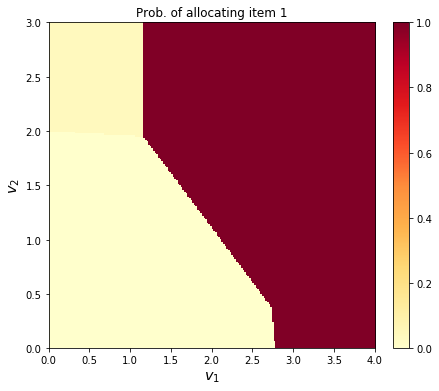

In [6]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))
img = ax.imshow(alloc[::-1, :, 0], extent=[0,4,0,3], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4.0/3)
                    
#plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
#plt.text(5.25, 6, s='0.5', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

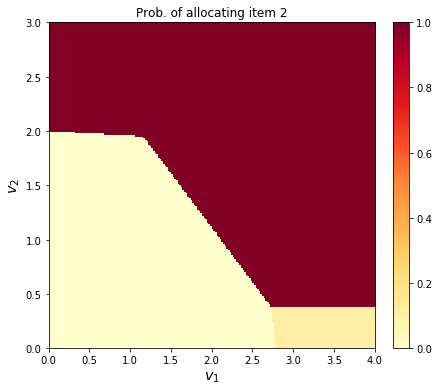

In [7]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))
img = ax.imshow(alloc[::-1, :, 1], extent=[0,4,0,3], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4.0/3)
                    
#plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
#plt.text(5.25, 6, s='0.5', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)